In [1]:
import pandas as pd
import numpy as np
import regex as re

In [2]:
df=pd.read_csv("../data/raw/YoutubeCommentsDataSet.csv")

In [3]:
df.shape

(18408, 2)

In [4]:
df.head()

Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [6]:
df.duplicated().sum()

np.int64(531)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Comment'].values

array(['lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased',
       'here in nz 50 of retailers don’t even have contactless credit card machines like paywave which support apple pay they don’t like the high fees that come with these',
       'i will forever acknowledge this channel with the help of your lessons and ideas explanations now its quite helpful while youll just sit at your comfort and monitor your account growth',
       ...,
       'excelente video con una pregunta filosófica profunda gracias por compartir esta reflexión sobre la base de tu experiencia pregunta cuáles son las tres herramientas framework data base and code writing de las que hablaste en el vídeo que tú usas',
       'hey daniel just discovered yo

In [10]:
df.isnull().sum()

Comment      3
Sentiment    0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df[df['Comment'].str.strip()==""]

Empty DataFrame
Columns: [Comment, Sentiment]
Index: []

In [13]:
# preprocessing part
# data has words like don't etc
# data has slangs
# data has words from different languages

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
df['Comment']=df['Comment'].str.lower().str.strip()

In [16]:
# no links in data
df["Comment"].apply(lambda x:len(re.findall(r"https?://\S+",x))).sum()

np.int64(0)

In [17]:
# no of punctuations marks
df["Comment"].apply(lambda x:len(re.findall(r"[^\w\s]",x))).sum()

np.int64(6779)

In [18]:
# different punctuation mark count
a=[]
for i in df["Comment"].apply(lambda x:re.findall(r"[^\w\s]",x)).values:
    a+=i

In [19]:
# removing puctutaion 
# df["Comment"]=df["Comment"].apply(lambda x:re.sub(r"https?://\S+"," ",x))

In [20]:
# no comment has \n
df["Comment"].apply(lambda x:"\n" in x).sum()

np.int64(0)

In [21]:
df.sample(10)['Comment'].values

array(['she has a very effective way of delivering information in a way that is accessible love her',
       'amazing research and presentation of information thanks lars',
       'boosie is one of the realest cant go around that this man stands up for what he believes in',
       'this wave looks amazing im amped to play these and relive the past once again i hope they bring koopa cape and peach gardens along the future waves those 2 tracks especially are my favorite tracks to run',
       'we finally got our first sponsor d pls check it out try dashlane for free on your first device and head to if you decide to upgrade to premium use my code luke for 50 off',
       'im about an hour in and i just wanted to say that im thankful for this tutorial everything is very clear and easy to understand this video is absolutely incredible for being right there for literally anyone to watch and learn a bunch of very valuable information',
       'we dont build the lives we want by saving time we

In [22]:
# mes="расслабляться наслаждаться э"
# import asyncio
# from googletrans import Translator

# async def translate_text(txt):
#     async with Translator() as translator:
#         result = await translator.translate(txt)
#         print(result)

# asyncio.run(translate_text(mes))

# EDA

## ideas
1) translate to english
## Conclusions
1) data is imbalanced
2) all numerical columns generated are right skewed

In [23]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
px.histogram(data_frame=df,x='Sentiment',text_auto=True)

In [25]:
px.pie(values=df['Sentiment'].value_counts().values,names=df['Sentiment'].value_counts().index)

In [26]:
# Length of sentiments
df['comment_len']=df['Comment'].apply(lambda x:len(x))
df.groupby('Sentiment')['comment_len'].mean()

Sentiment
negative    210.815710
neutral     195.010437
positive    163.493577
Name: comment_len, dtype: float64

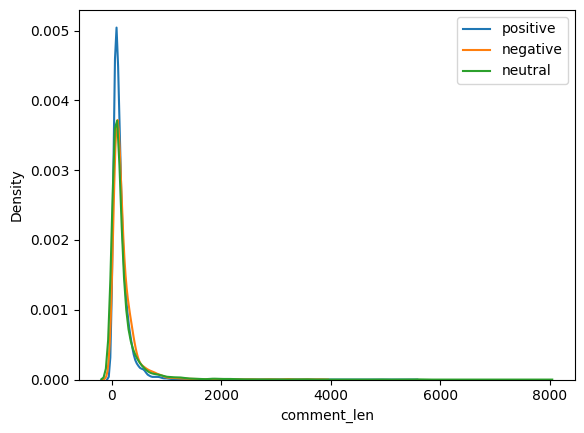

In [27]:
sns.kdeplot(df[df['Sentiment']=='positive']['comment_len'],label="positive")
sns.kdeplot(df[df['Sentiment']=='negative']['comment_len'],label="negative")
sns.kdeplot(df[df['Sentiment']=='neutral']['comment_len'],label="neutral")
plt.legend()

In [28]:
# word counts
df['word_count']=df['Comment'].apply(lambda x:len(x.split()))
df.groupby('Sentiment')['word_count'].mean()

Sentiment
negative    39.103582
neutral     35.450144
positive    30.709065
Name: word_count, dtype: float64

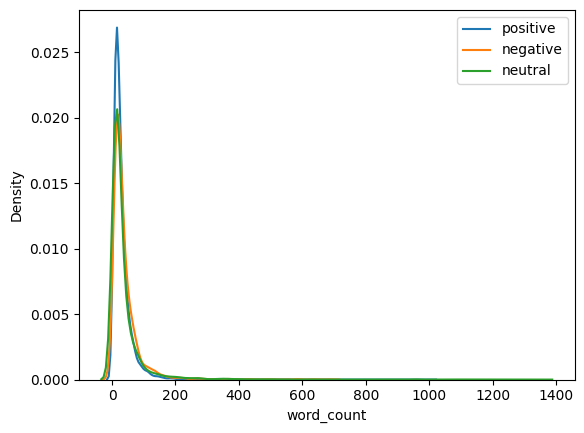

In [29]:
sns.kdeplot(df[df['Sentiment']=='positive']['word_count'],label="positive")
sns.kdeplot(df[df['Sentiment']=='negative']['word_count'],label="negative")
sns.kdeplot(df[df['Sentiment']=='neutral']['word_count'],label="neutral")
plt.legend()

In [30]:
df['char_per_words']=df['comment_len']/df['word_count']
df.groupby('Sentiment')['char_per_words'].mean()

Sentiment
negative    5.378125
neutral     5.834699
positive    5.347229
Name: char_per_words, dtype: float64

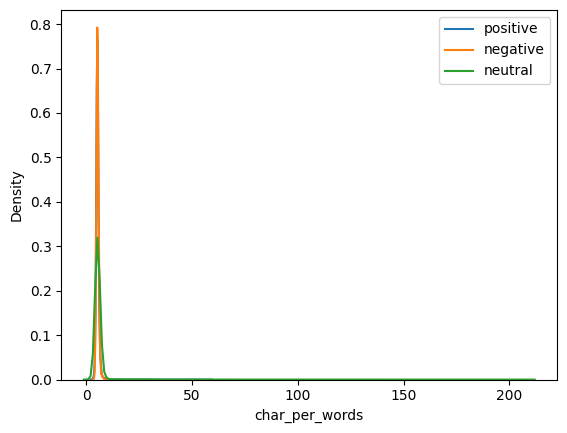

In [31]:
sns.kdeplot(df[df['Sentiment']=='positive']['char_per_words'],label="positive")
sns.kdeplot(df[df['Sentiment']=='negative']['char_per_words'],label="negative")
sns.kdeplot(df[df['Sentiment']=='neutral']['char_per_words'],label="neutral")
plt.legend()

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stpWrd = stopwords.words("english")
stop_count_d={}
def count_stopword(txt):
    count=0
    for word in txt.split():
        if word in stpWrd:
            stop_count_d[word]=stop_count_d.get(word,0)+1
            count+=1
    return count

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['stopword_count']=df['Comment'].apply(count_stopword)

In [34]:
stop_count_d_sorted=dict(sorted(stop_count_d.items(),key=lambda x:stop_count_d[x[0]],reverse=True)[:25])
# top 25
px.bar(y=stop_count_d_sorted.keys(),x=stop_count_d_sorted.values())

In [35]:
df.groupby('Sentiment')['stopword_count'].median(),df.groupby('Sentiment')['stopword_count'].mean()

(Sentiment
 negative    12.0
 neutral      6.0
 positive    10.0
 Name: stopword_count, dtype: float64,
 Sentiment
 negative    18.509279
 neutral     12.936487
 positive    13.960829
 Name: stopword_count, dtype: float64)

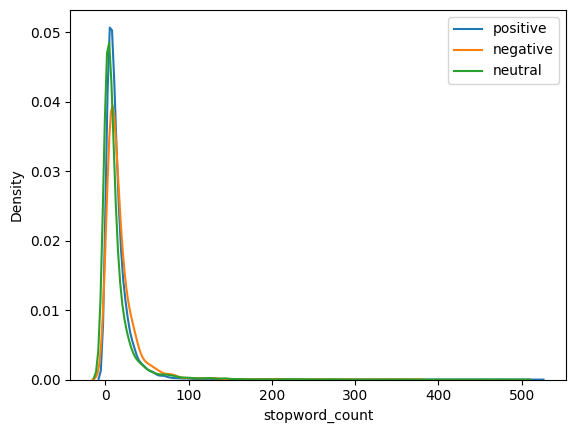

In [36]:
sns.kdeplot(df[df['Sentiment']=='positive']['stopword_count'],label="positive")
sns.kdeplot(df[df['Sentiment']=='negative']['stopword_count'],label="negative")
sns.kdeplot(df[df['Sentiment']=='neutral']['stopword_count'],label="neutral")
plt.legend()

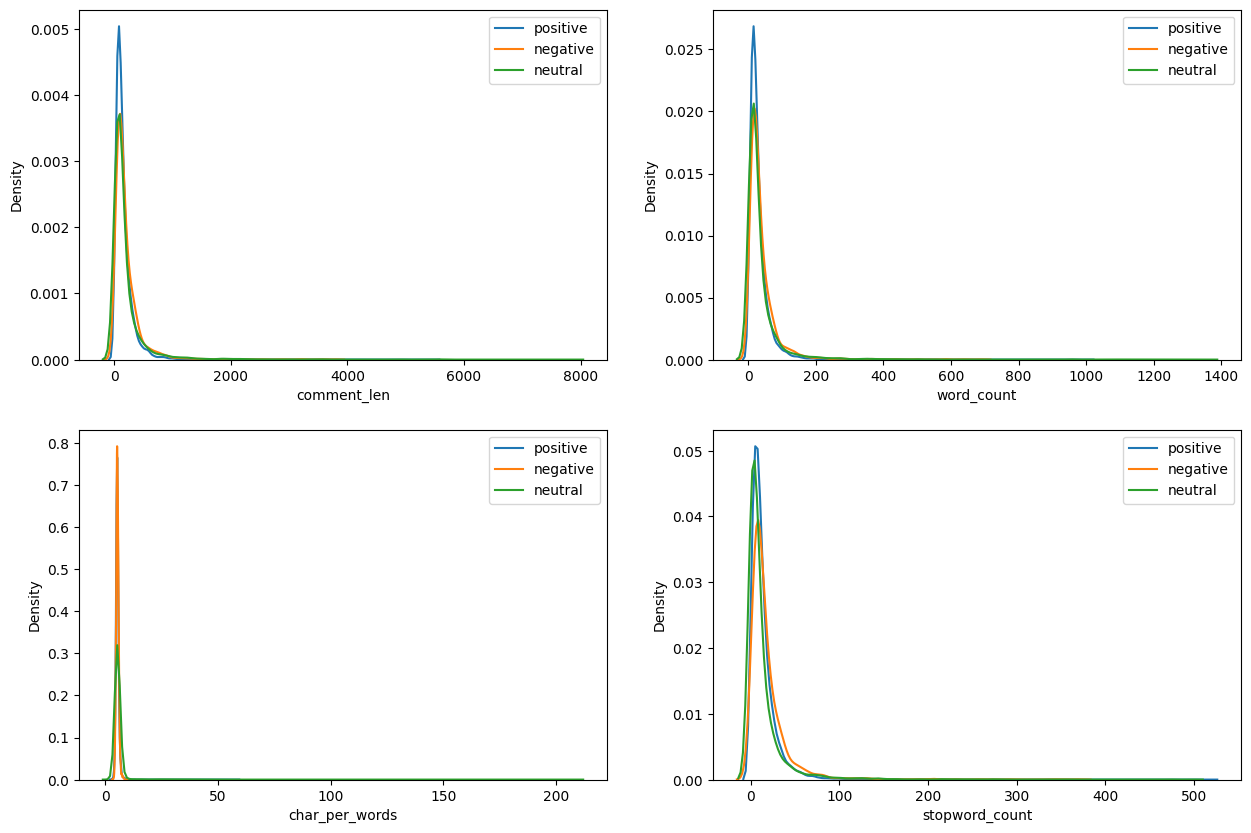

In [37]:
# plotting above curves horizontally to see diff 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.kdeplot(df[df['Sentiment']=='positive']['comment_len'],label="positive",ax=axes[0][0])
sns.kdeplot(df[df['Sentiment']=='negative']['comment_len'],label="negative",ax=axes[0][0])
sns.kdeplot(df[df['Sentiment']=='neutral']['comment_len'],label="neutral",ax=axes[0][0])
sns.kdeplot(df[df['Sentiment']=='positive']['word_count'],label="positive",ax=axes[0][1])
sns.kdeplot(df[df['Sentiment']=='negative']['word_count'],label="negative",ax=axes[0][1])
sns.kdeplot(df[df['Sentiment']=='neutral']['word_count'],label="neutral",ax=axes[0][1])
sns.kdeplot(df[df['Sentiment']=='positive']['char_per_words'],label="positive",ax=axes[1][0])
sns.kdeplot(df[df['Sentiment']=='negative']['char_per_words'],label="negative",ax=axes[1][0])
sns.kdeplot(df[df['Sentiment']=='neutral']['char_per_words'],label="neutral",ax=axes[1][0])
sns.kdeplot(df[df['Sentiment']=='positive']['stopword_count'],label="positive",ax=axes[1][1])
sns.kdeplot(df[df['Sentiment']=='negative']['stopword_count'],label="negative",ax=axes[1][1])
sns.kdeplot(df[df['Sentiment']=='neutral']['stopword_count'],label="neutral",ax=axes[1][1])
axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

In [38]:
# no need to handle contractions as stopword handles them this is just for eda
contractions = [
    "i’m",
    "you’re",
    "he’s",
    "she’s",
    "it’s",
    "we’re",
    "they’re",
    "i’ve",
    "you’ve",
    "we’ve",
    "they’ve",
    "i’d",
    "you’d",
    "he’d",
    "she’d",
    "we’d",
    "they’d",
    "i’ll",
    "you’ll",
    "he’ll",
    "she’ll",
    "we’ll",
    "they’ll",
    "isn’t",
    "aren’t",
    "wasn’t",
    "weren’t",
    "haven’t",
    "hasn’t",
    "hadn’t",
    "don’t",
    "doesn’t",
    "didn’t",
    "can’t",
    "couldn’t",
    "won’t",
    "wouldn’t",
    "shouldn’t",
    "mustn’t",
    "what’s",
    "where’s",
    "when’s",
    "who’s",
    "how’s",
    "that’s",
    "there’s",
    "y’all"
]

explanations=['i am',
'you are',
'he is ',
'she is ',
'it is ',
'we are',
'they are',
'i have',
'you have',
'we have',
'they have',
'i would ',
'you would ',
'he would ',
'she would ',
'we would ',
'they would ',
'i will',
'you will',
'he will',
'she will',
'we will',
'they will',
'is not',
'are not',
'was not',
'were not',
'have not',
'has not',
'had not',
'do not',
'does not',
'did not',
'cannot',
'could not',
'will not',
'would not',
'should not',
'must not',
'what is',
'where is',
'when is',
'who is',
'how is',
'that is',
'there is',
'you all']

apos_count_d={}
def apos_count(txt):
    count=0
    for i in txt.split():
        if i in contractions:  
            count+=1
            apos_count_d[i]=apos_count_d.get(i,0)+1
    return count

In [39]:
df['apos_count']=df['Comment'].apply(apos_count)

In [40]:
apos_count_d_sorted=dict(sorted(apos_count_d.items(),key=lambda x:apos_count_d[x[0]],reverse=True)[:25])
# top 25
px.bar(y=apos_count_d_sorted.keys(),x=apos_count_d_sorted.values())
# apos_count_d_sorted

In [41]:
df.groupby('Sentiment')['apos_count'].mean()

Sentiment
negative    0.276219
neutral     0.123251
positive    0.189343
Name: apos_count, dtype: float64

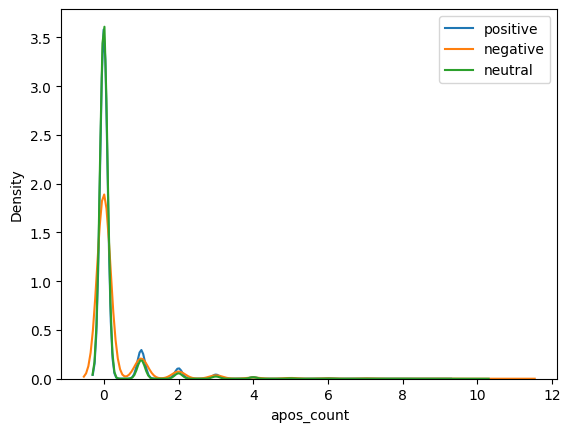

In [42]:
sns.kdeplot(df[df['Sentiment']=='positive']['apos_count'],label="positive")
sns.kdeplot(df[df['Sentiment']=='negative']['apos_count'],label="negative")
sns.kdeplot(df[df['Sentiment']=='neutral']['apos_count'],label="neutral")
plt.legend()

In [43]:
word_frq={}
def count_ch(txt):
    for ch in txt:
        word_frq[ch]=word_frq.get(ch,0)+1

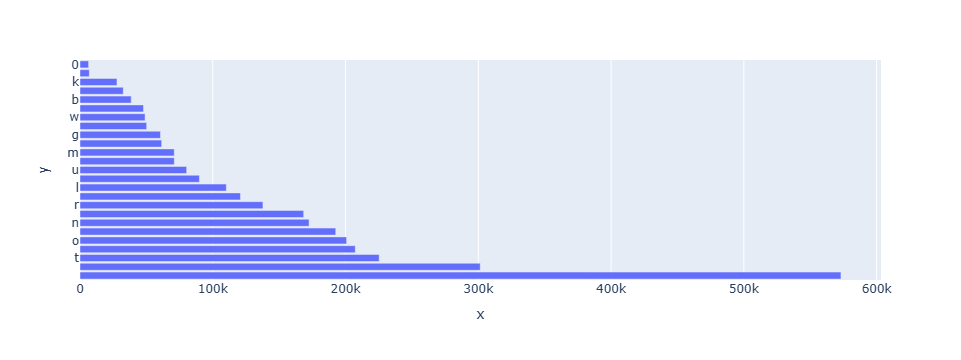

In [44]:
df['Comment'].apply(count_ch)
word_frq_sorted=dict(sorted(word_frq.items(),key=lambda x:word_frq[x[0]],reverse=True)[:25])
# top 25
px.bar(y=word_frq_sorted.keys(),x=word_frq_sorted.values())
# apos_count_d_sorted

In [45]:
a=dict(sorted(word_frq.items(),key=lambda x:word_frq[x[0]],reverse=True))
len(a),a

(1900,
 {' ': 573123,
  'e': 301435,
  't': 225325,
  'a': 207323,
  'o': 200811,
  'i': 192615,
  'n': 172531,
  's': 168467,
  'r': 137793,
  'h': 120846,
  'l': 110188,
  'd': 89910,
  'u': 80331,
  'c': 71019,
  'm': 70977,
  'y': 61495,
  'g': 60596,
  'p': 50206,
  'w': 49011,
  'f': 47827,
  'b': 38566,
  'v': 32573,
  'k': 27841,
  'j': 7020,
  '0': 6469,
  '1': 6212,
  'x': 6204,
  '2': 5639,
  '3': 4134,
  '’': 4008,
  '5': 3520,
  'z': 3336,
  '4': 3214,
  'q': 3038,
  '6': 1668,
  '8': 1508,
  '7': 1416,
  '9': 1303,
  '“': 683,
  '”': 655,
  'é': 566,
  'á': 493,
  '—': 428,
  'о': 373,
  'í': 372,
  'а': 340,
  'ó': 333,
  '…': 279,
  'е': 268,
  'и': 233,
  'à': 217,
  'с': 213,
  'т': 212,
  'ã': 202,
  'н': 197,
  'ا': 195,
  'л': 162,
  'ú': 160,
  'в': 156,
  'ı': 154,
  'ü': 149,
  'ç': 149,
  'ل': 144,
  'р': 143,
  'ê': 142,
  'к': 138,
  'đ': 132,
  'м': 127,
  'า': 122,
  'ा': 116,
  'ي': 112,
  'م': 110,
  'д': 103,
  'อ': 102,
  'น': 102,
  'े': 99,
  'න': 99,

In [46]:
word_frq={}
def count_ch(txt):
    for ch in txt.split():
        word_frq[ch]=word_frq.get(ch,0)+1

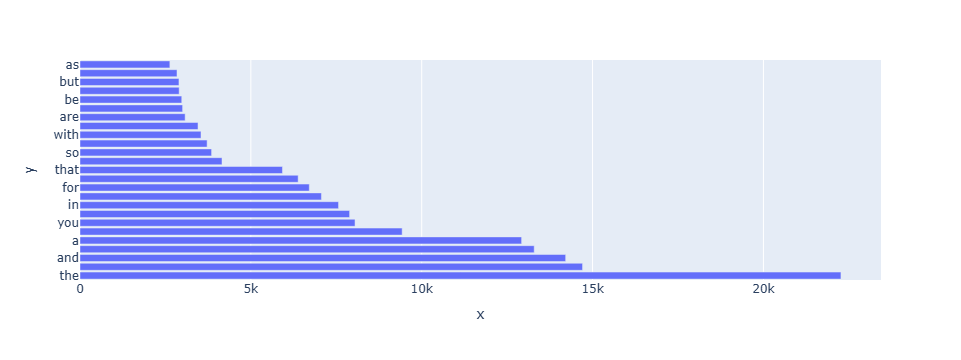

In [47]:
df['Comment'].apply(count_ch)
word_frq_sorted=dict(sorted(word_frq.items(),key=lambda x:word_frq[x[0]],reverse=True)[:25])
# top 25
px.bar(y=word_frq_sorted.keys(),x=word_frq_sorted.values())
# apos_count_d_sorted

In [48]:
a=dict(sorted(word_frq.items(),key=lambda x:word_frq[x[0]],reverse=True))
len(a),a

(41410,
 {'the': 22269,
  'to': 14707,
  'and': 14213,
  'i': 13292,
  'a': 12924,
  'of': 9428,
  'you': 8049,
  'is': 7890,
  'in': 7566,
  'this': 7065,
  'for': 6710,
  'it': 6384,
  'that': 5925,
  'my': 4156,
  'so': 3851,
  'on': 3720,
  'with': 3541,
  'was': 3454,
  'are': 3077,
  'have': 3003,
  'be': 2978,
  'your': 2902,
  'but': 2896,
  'me': 2839,
  'as': 2630,
  'like': 2587,
  'just': 2530,
  'all': 2321,
  'how': 2197,
  'they': 2150,
  'love': 2084,
  'not': 2065,
  'he': 2056,
  'at': 2000,
  'one': 1953,
  'what': 1908,
  'can': 1901,
  'video': 1890,
  'more': 1843,
  'we': 1836,
  'if': 1791,
  'when': 1769,
  'from': 1731,
  'its': 1715,
  'about': 1711,
  'really': 1629,
  'an': 1576,
  'or': 1563,
  'do': 1555,
  'time': 1491,
  'thank': 1484,
  'great': 1474,
  'im': 1459,
  'much': 1429,
  'up': 1420,
  'will': 1408,
  'good': 1373,
  'get': 1369,
  'out': 1368,
  'his': 1318,
  'would': 1317,
  'people': 1220,
  'has': 1186,
  'these': 1130,
  'very': 1115,


In [50]:
# postive negative word_count
from tqdm import tqdm 
tqdm.pandas()

from nltk.stem.porter import PorterStemmer
import nltk
ps = PorterStemmer()
nltk.download("stopwords")

stpWrd = stopwords.words("english")

positive_words = [
    "ambitious", "brave", "compassionate", "dazzling", "empowering", "flourishing",
    "generous", "hopeful", "innovative", "joyful", "kindhearted", "luminous",
    "motivated", "nurturing", "optimistic", "passionate", "resilient", "serene",
    "thriving", "unwavering", "vibrant", "warmhearted", "exuberant", "youthful",
    "affable", "bountiful", "charismatic", "delightful", "eloquent", "faithful",
    "gracious",
    # Common YT positives
    "awesome", "amazing", "love", "liked", "favorite", "best", "wonderful", "great",
    "impressive", "epic", "brilliant", "fantastic", "beautiful", "excellent",
    "masterful", "helpful", "informative", "inspiring", "thank you", "thanks",
    "legend", "wholesome", "valid", "based", "respect"
]

negative_words = [
    "abrasive", "bleak", "clumsy", "dismal", "evasive", "frivolous", "gruesome",
    "harsh", "ignorant", "jaded", "lethargic", "malicious", "nefarious", "obnoxious",
    "pernicious", "querulous", "repugnant", "sinister", "toxic", "unsettling", "vile",
    "warped", "xenophobic", "accusatory", "belligerent", "coercive", "deceptive",
    "expendable", "flippant", "glib",
    # Common YT negatives
    "bad", "hate", "worst", "boring", "trash", "awful", "fail", "useless", "sucks",
    "cringe", "disappointing", "scam", "fake", "terrible", "mistake", "weak",
    "stupid", "annoying", "dumb", "flawed", "spam", "clickbait", "bot", "repetitive",
    "waste", "mid", "copium", "lame"
]

neutral_words = [
    # Mostly descriptive / factual / context-dependent
    "antique", "brisk", "candid", "durable", "eclectic", "formal", "generic",
    "hybrid", "implicit", "juxtaposed", "kinetic", "literal", "methodical",
    "objective", "pragmatic", "resolute", "sparse", "technical", "uniform",
    "analytical", "benchmark", "comprehensive", "debatable", "efficient",
    "fragmented", "groundbreaking", "average", "decent", "typical", "normal",
    "fair", "sure", "possible", "depends", "middle", "moderate", "factual",
    # Context-sensitive words (can be + or - depending on tone)
    "interesting", "okay", "ok", "fine", "cool", "alright", "neutral", "so-so",
    "maybe", "sometimes"
]

neutral_wrod_list=[ps.stem(word) for word in neutral_words]
positive_wrod_list=[ps.stem(word) for word in positive_words]
negative_wrod_list=[ps.stem(word) for word in negative_words]

# stemming and stopword removal
def stemming(txt):
    new_txt = []
    for word in txt.split():
        if word not in stpWrd:
            new_txt.append(ps.stem(word))
    return " ".join(new_txt)



count_neg={}
def countNegative(lst):
    count=0
    for i in lst.split():
        if i in negative_wrod_list:
            count_neg[i]=count_neg.get(i,0)+1
            count+=1
    return count
    
count_pos={}
def countPositive(lst):
    count=0
    for i in lst.split():
        if i in positive_wrod_list:
            count_pos[i]=count_pos.get(i,0)+1
            count+=1
    return count

count_neu={}
def countNeutral(lst):
    count=0
    for i in lst.split():
        if i in neutral_wrod_list:
            count_neu[i]=count_neu.get(i,0)+1
            count+=1
    return count

df['Comment_stemmed']=df['Comment'].progress_apply(stemming)
df["PositiveWordCount"]=df["Comment_stemmed"].progress_apply(countPositive)
df["NegativeWordCount"]=df["Comment_stemmed"].progress_apply(countNegative)
df["NeutralWordCount"]=df["Comment_stemmed"].progress_apply(countNeutral)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 17874/17874 [00:00<00:00, 34265.73it/s]


In [53]:
len(positive_wrod_list),len(negative_wrod_list),len(neutral_wrod_list)

(56, 58, 47)

In [54]:
a=dict(sorted(count_pos.items(),key=lambda x:count_pos[x[0]],reverse=True))
len(a),a

(50,
 {'like': 2772,
  'love': 2437,
  'thank': 2364,
  'great': 1489,
  'help': 928,
  'best': 848,
  'amaz': 740,
  'hope': 598,
  'awesom': 348,
  'wonder': 279,
  'inform': 273,
  'respect': 254,
  'beauti': 249,
  'inspir': 213,
  'gener': 203,
  'favorit': 188,
  'base': 165,
  'master': 158,
  'impress': 144,
  'excel': 136,
  'motiv': 113,
  'fantast': 109,
  'legend': 106,
  'passion': 98,
  'brilliant': 76,
  'joy': 52,
  'epic': 41,
  'wholesom': 25,
  'brave': 21,
  'youth': 21,
  'faith': 17,
  'innov': 17,
  'valid': 16,
  'thrive': 12,
  'delight': 12,
  'optimist': 8,
  'eloqu': 6,
  'flourish': 5,
  'compassion': 4,
  'bounti': 4,
  'charismat': 4,
  'empow': 3,
  'ambiti': 3,
  'resili': 2,
  'nurtur': 1,
  'graciou': 1,
  'exuber': 1,
  'dazzl': 1,
  'seren': 1,
  'kindheart': 1})

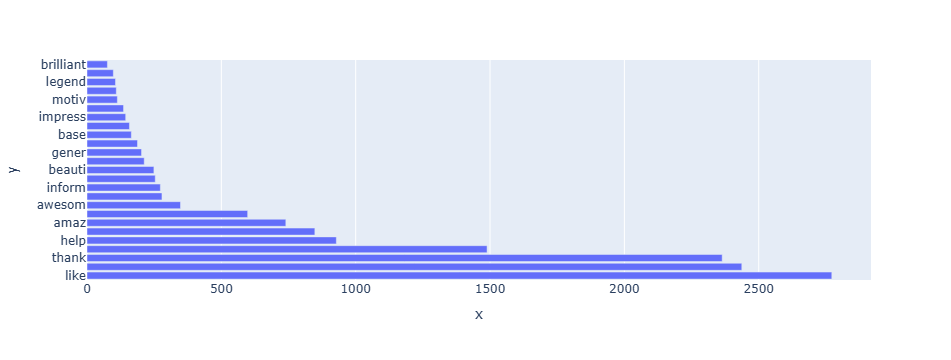

In [55]:
count_pos_sorted=dict(sorted(count_pos.items(),key=lambda x:count_pos[x[0]],reverse=True)[:25])
# top 25
px.bar(y=count_pos_sorted.keys(),x=count_pos_sorted.values())

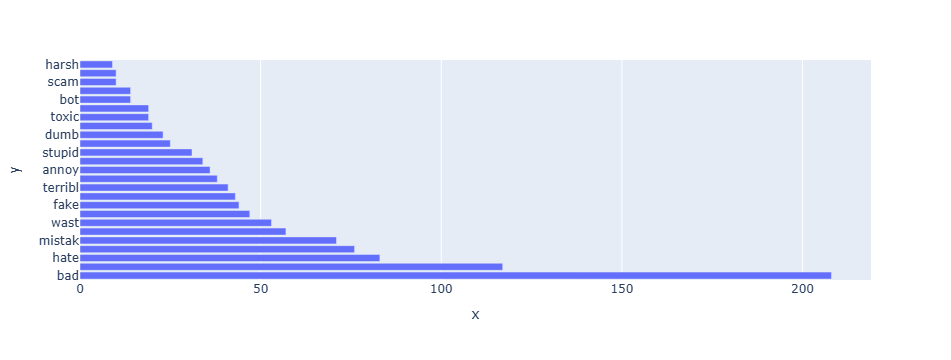

In [56]:
count_neg_sorted=dict(sorted(count_neg.items(),key=lambda x:count_neg[x[0]],reverse=True)[:25])
# top 25
px.bar(y=count_neg_sorted.keys(),x=count_neg_sorted.values())

In [57]:
a=dict(sorted(count_neg.items(),key=lambda x:count_neg[x[0]],reverse=True))
len(a),a

(44,
 {'bad': 208,
  'fail': 117,
  'hate': 83,
  'disappoint': 76,
  'mistak': 71,
  'ignor': 57,
  'wast': 53,
  'bore': 47,
  'fake': 44,
  'worst': 43,
  'terribl': 41,
  'suck': 38,
  'annoy': 36,
  'weak': 34,
  'stupid': 31,
  'aw': 25,
  'dumb': 23,
  'useless': 20,
  'toxic': 19,
  'trash': 19,
  'bot': 14,
  'flaw': 14,
  'scam': 10,
  'mid': 10,
  'harsh': 9,
  'clickbait': 9,
  'repetit': 7,
  'spam': 6,
  'cring': 5,
  'obnoxi': 4,
  'vile': 3,
  'decept': 3,
  'warp': 3,
  'bleak': 2,
  'jade': 2,
  'clumsi': 1,
  'malici': 1,
  'nefari': 1,
  'xenophob': 1,
  'gruesom': 1,
  'flippant': 1,
  'expend': 1,
  'lame': 1,
  'sinist': 1})

In [58]:
a=dict(sorted(count_neu.items(),key=lambda x:count_neu[x[0]],reverse=True))
len(a),a

(41,
 {'interest': 416,
  'sure': 315,
  'cool': 274,
  'liter': 266,
  'possibl': 220,
  'gener': 203,
  'mayb': 176,
  'method': 129,
  'sometim': 110,
  'normal': 102,
  'fine': 66,
  'depend': 66,
  'technic': 60,
  'averag': 60,
  'okay': 58,
  'ok': 50,
  'middl': 46,
  'object': 45,
  'fair': 44,
  'analyt': 44,
  'decent': 32,
  'effici': 32,
  'typic': 29,
  'candid': 21,
  'comprehens': 16,
  'debat': 16,
  'resolut': 14,
  'alright': 10,
  'formal': 10,
  'uniform': 8,
  'hybrid': 7,
  'neutral': 7,
  'kinet': 7,
  'factual': 6,
  'moder': 4,
  'spars': 2,
  'durabl': 2,
  'fragment': 2,
  'groundbreak': 2,
  'eclect': 1,
  'benchmark': 1})

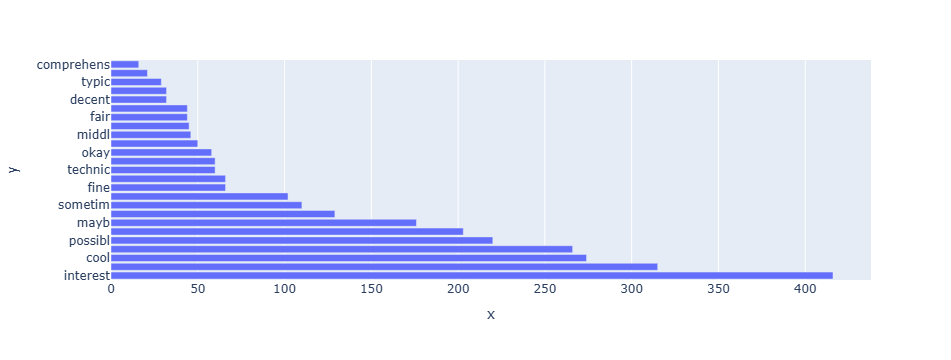

In [59]:
count_neu_sorted=dict(sorted(count_neu.items(),key=lambda x:count_neu[x[0]],reverse=True)[:25])
# top 25
px.bar(y=count_neu_sorted.keys(),x=count_neu_sorted.values())

In [60]:
df['PositiveWordCount'].value_counts(),df['NegativeWordCount'].value_counts(),df['NeutralWordCount'].value_counts()

(PositiveWordCount
 0     8879
 1     5113
 2     2352
 3      921
 4      367
 5      132
 6       50
 7       26
 8       13
 9        7
 11       4
 12       2
 10       2
 23       1
 17       1
 33       1
 13       1
 14       1
 22       1
 Name: count, dtype: int64,
 NegativeWordCount
 0    16859
 1      870
 2      118
 3       21
 4        4
 5        2
 Name: count, dtype: int64,
 NeutralWordCount
 0     15533
 1      1917
 2       308
 3        77
 4        21
 5         7
 6         6
 7         2
 19        2
 8         1
 Name: count, dtype: int64)

C:\Users\panka\AppData\Local\Temp\ipykernel_29132\843835279.py:15: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

C:\Users\panka\AppData\Local\Temp\ipykernel_29132\843835279.py:22: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

C:\Users\panka\AppData\Local\Temp\ipykernel_29132\843835279.py:29: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



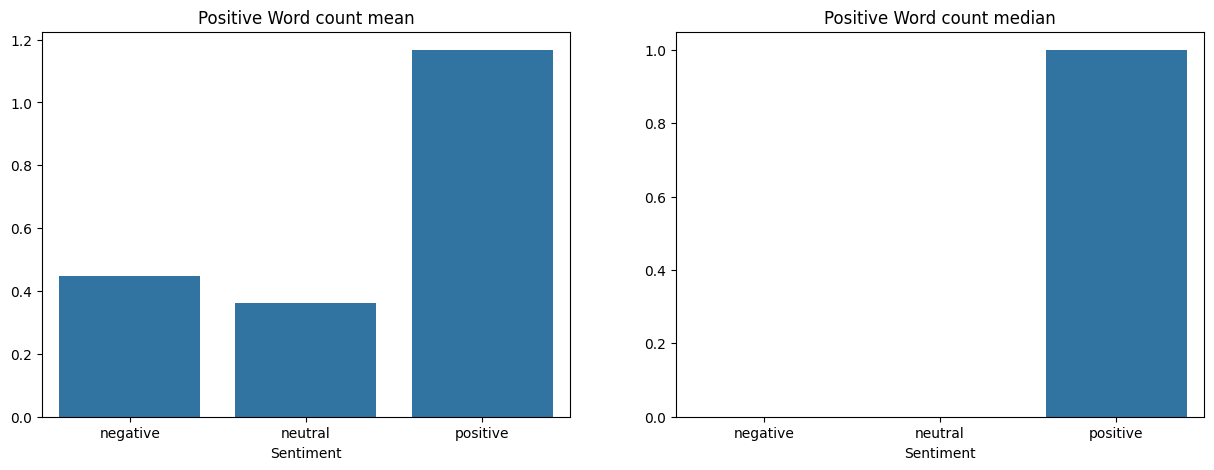

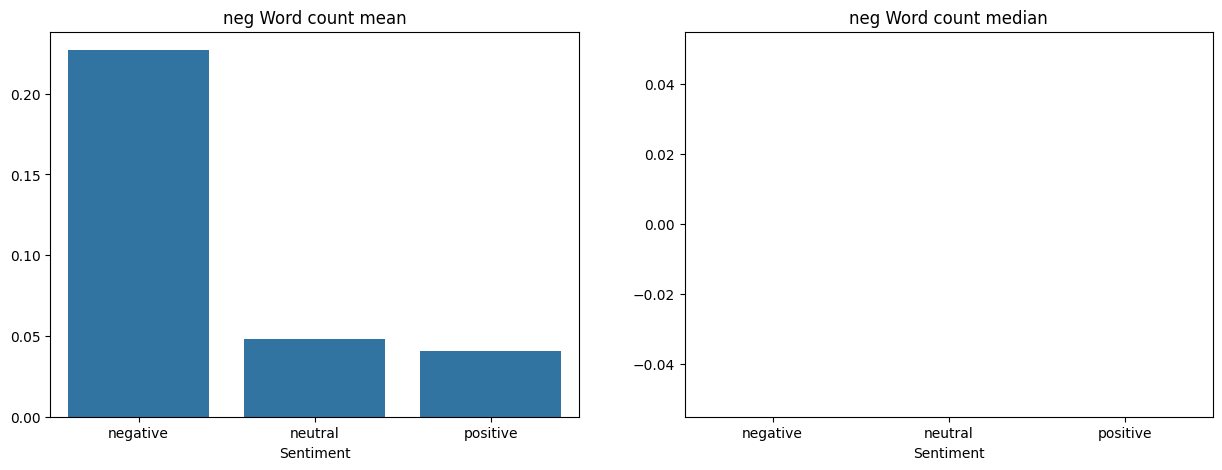

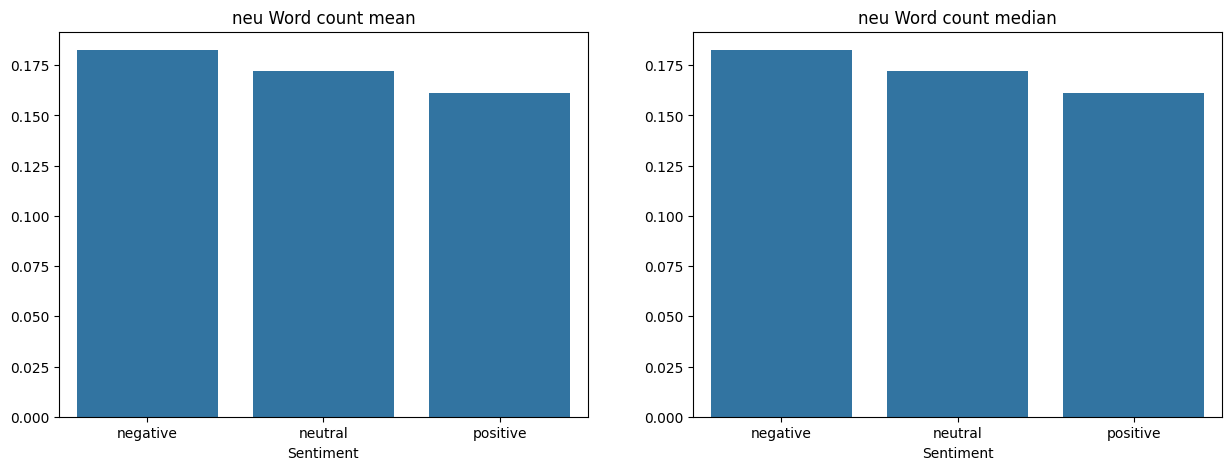

In [61]:
# means
pos=df.groupby('Sentiment')['PositiveWordCount'].mean()
neg=df.groupby('Sentiment')['NegativeWordCount'].mean()
neu=df.groupby('Sentiment')['NeutralWordCount'].mean()

pos_med=df.groupby('Sentiment')['PositiveWordCount'].median()
neg_med=df.groupby('Sentiment')['NegativeWordCount'].median()
neu_med=df.groupby('Sentiment')['NeutralWordCount'].median()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(y=pos.values,x=pos.index,ax=axes[0])
axes[0].set_title("Positive Word count mean")
sns.barplot(y=pos_med.values,x=pos_med.index,ax=axes[1])
axes[1].set_title("Positive Word count median")
fig.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(y=neg.values,x=neg.index,ax=axes[0])
axes[0].set_title("neg Word count mean")
sns.barplot(y=neg_med.values,x=neg_med.index,ax=axes[1])
axes[1].set_title("neg Word count median")
fig.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(y=neu.values,x=neu.index,ax=axes[0])
axes[0].set_title("neu Word count mean")
sns.barplot(y=neu.values,x=neu.index,ax=axes[1])
axes[1].set_title("neu Word count median")
fig.show()

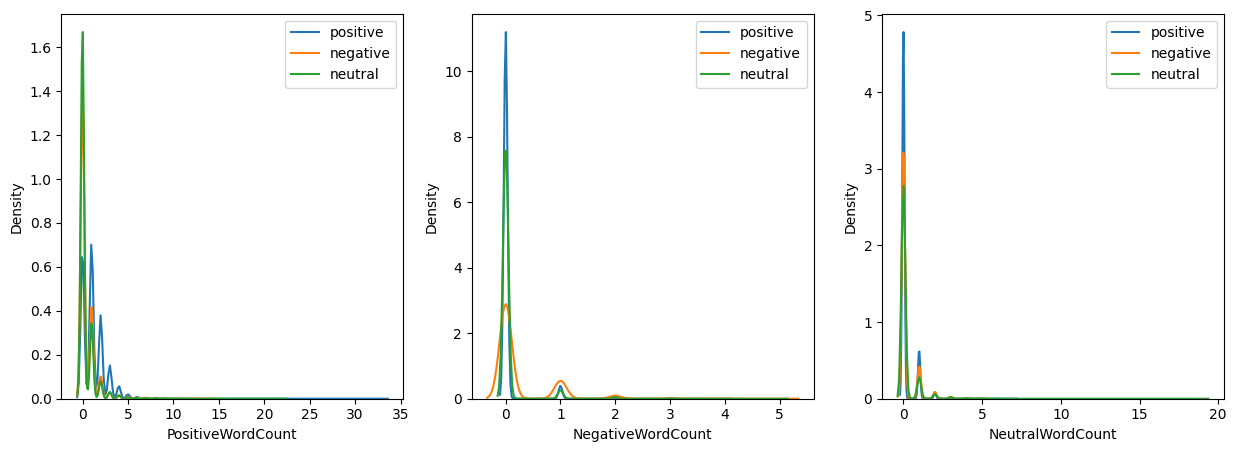

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(df[df['Sentiment']=='positive']['PositiveWordCount'],label="positive",ax=axes[0])
sns.kdeplot(df[df['Sentiment']=='negative']['PositiveWordCount'],label="negative",ax=axes[0])
sns.kdeplot(df[df['Sentiment']=='neutral']['PositiveWordCount'],label="neutral",ax=axes[0])

sns.kdeplot(df[df['Sentiment']=='positive']['NegativeWordCount'],label="positive",ax=axes[1])
sns.kdeplot(df[df['Sentiment']=='negative']['NegativeWordCount'],label="negative",ax=axes[1])
sns.kdeplot(df[df['Sentiment']=='neutral']['NegativeWordCount'],label="neutral",ax=axes[1])


sns.kdeplot(df[df['Sentiment']=='positive']['NeutralWordCount'],label="positive",ax=axes[2])
sns.kdeplot(df[df['Sentiment']=='negative']['NeutralWordCount'],label="negative",ax=axes[2])
sns.kdeplot(df[df['Sentiment']=='neutral']['NeutralWordCount'],label="neutral",ax=axes[2])

axes[0].legend()
axes[1].legend()
axes[2].legend()

<Axes: xlabel='char_per_words', ylabel='Density'>

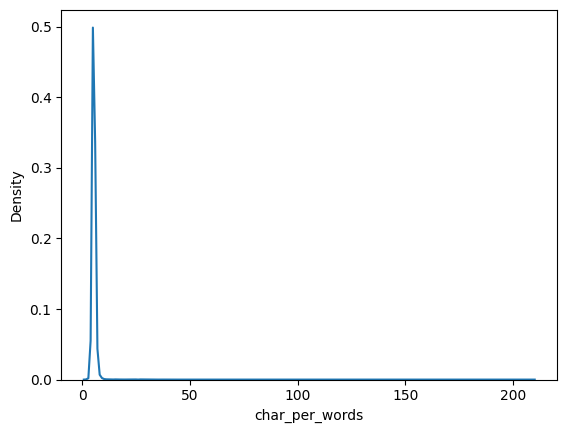

In [63]:
import plotly.io as pio
pio.renderers.default = "notebook"
px.box(df,y='char_per_words').show()
sns.kdeplot(df,x='char_per_words')

In [64]:
df.head()

Comment Sentiment  comment_len  \
0  lets not forget that apple pay in 2014 require...   neutral          317   
1  here in nz 50 of retailers don’t even have con...  negative          163   
2  i will forever acknowledge this channel with t...  positive          183   
3  whenever i go to a place that doesn’t take app...  negative          450   
4  apple pay is so convenient secure and easy to ...  positive          135   

   word_count  char_per_words  stopword_count  apos_count  \
0          57        5.561404              23           0   
1          29        5.620690              10           2   
2          31        5.903226              16           0   
3          83        5.421687              34           7   
4          26        5.192308              12           0   

                                     Comment_stemmed  PositiveWordCount  \
0  let forget appl pay 2014 requir brand new ipho...                  1   
1  nz 50 retail don’t even contactless credit car...                  2   
2  forev acknowledg channel help lesson idea expl...                  2   
3  whenev go place doesn’t take appl pay doesn’t ...                  1   
4  appl pay conveni secur easi use use korean jap...                  0   

   NegativeWordCount  NeutralWordCount  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  1                 0  
4                  0                 0

<Axes: xlabel='word_count', ylabel='Density'>

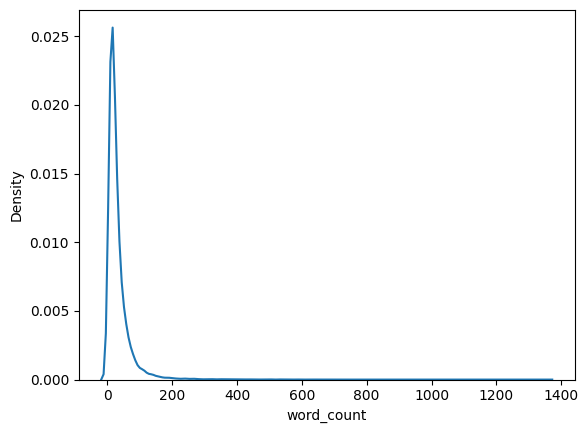

In [65]:
px.box(df,y='word_count').show()
sns.kdeplot(df,x='word_count')

<Axes: xlabel='comment_len', ylabel='Density'>

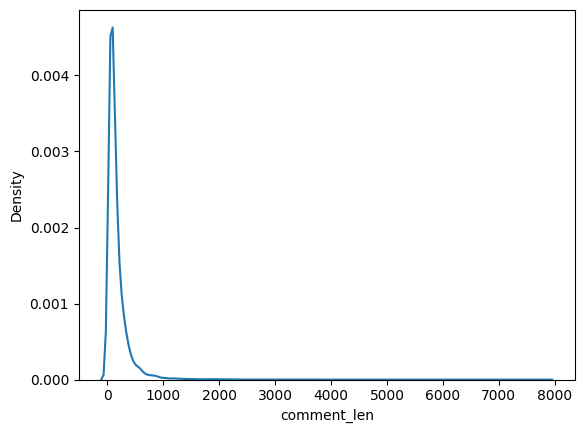

In [66]:
px.box(df,y='comment_len').show()
sns.kdeplot(df,x='comment_len')

<Axes: xlabel='stopword_count', ylabel='Density'>

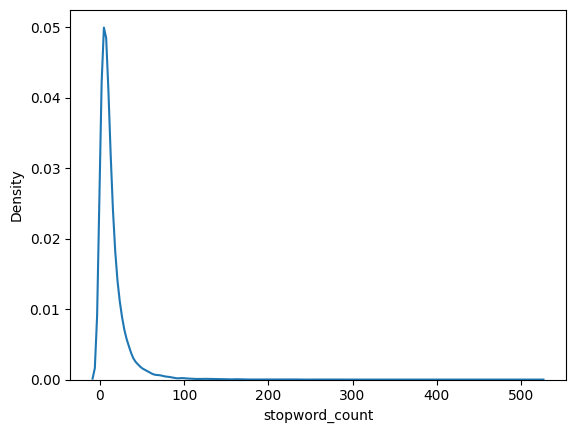

In [67]:
px.box(df,y='stopword_count').show()
sns.kdeplot(df,x='stopword_count')

<Axes: xlabel='apos_count', ylabel='Density'>

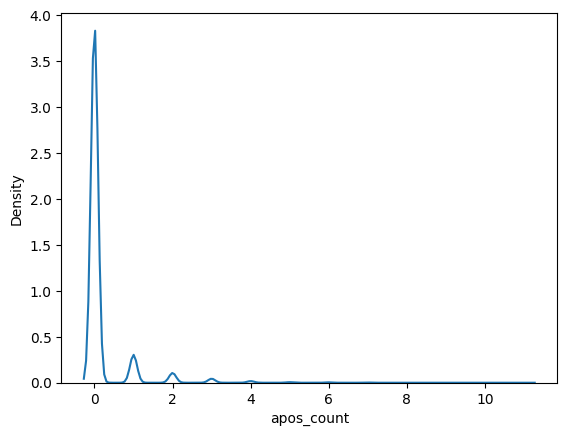

In [68]:
px.box(df,y='apos_count').show()
sns.kdeplot(df,x='apos_count')

In [69]:
px.scatter(df,x='comment_len',y='word_count')

In [70]:
df.head()

Comment Sentiment  comment_len  \
0  lets not forget that apple pay in 2014 require...   neutral          317   
1  here in nz 50 of retailers don’t even have con...  negative          163   
2  i will forever acknowledge this channel with t...  positive          183   
3  whenever i go to a place that doesn’t take app...  negative          450   
4  apple pay is so convenient secure and easy to ...  positive          135   

   word_count  char_per_words  stopword_count  apos_count  \
0          57        5.561404              23           0   
1          29        5.620690              10           2   
2          31        5.903226              16           0   
3          83        5.421687              34           7   
4          26        5.192308              12           0   

                                     Comment_stemmed  PositiveWordCount  \
0  let forget appl pay 2014 requir brand new ipho...                  1   
1  nz 50 retail don’t even contactless credit car...                  2   
2  forev acknowledg channel help lesson idea expl...                  2   
3  whenev go place doesn’t take appl pay doesn’t ...                  1   
4  appl pay conveni secur easi use use korean jap...                  0   

   NegativeWordCount  NeutralWordCount  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  1                 0  
4                  0                 0

In [71]:
px.scatter(df,x='comment_len',y='char_per_words')

In [72]:
px.scatter(df,x='comment_len',y='stopword_count')

In [73]:
px.scatter(df,x='word_count',y='stopword_count')

In [74]:
px.scatter(df,x='comment_len',y='apos_count')

In [75]:
px.imshow(df[['comment_len','word_count','char_per_words','stopword_count','apos_count']].corr(),text_auto=True)

In [76]:
# i will try to dop few of these columns due to high corr

<Figure size 2000x2000 with 0 Axes>

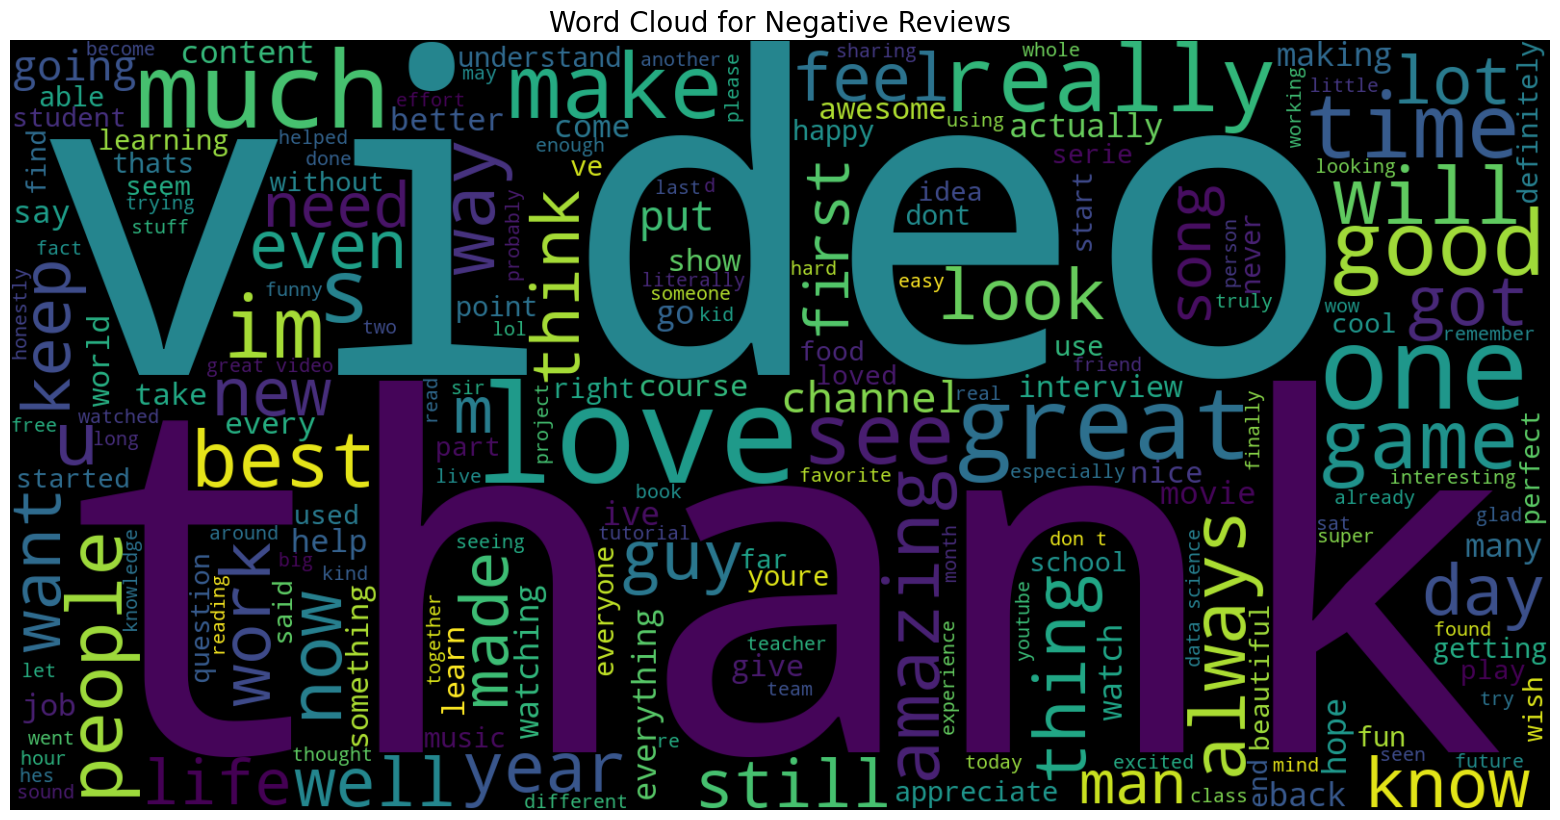

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600, height=800).generate(" ".join(df[df["Sentiment"]=='positive']['Comment']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews", fontsize=20)
plt.show()

<Figure size 2000x2000 with 0 Axes>

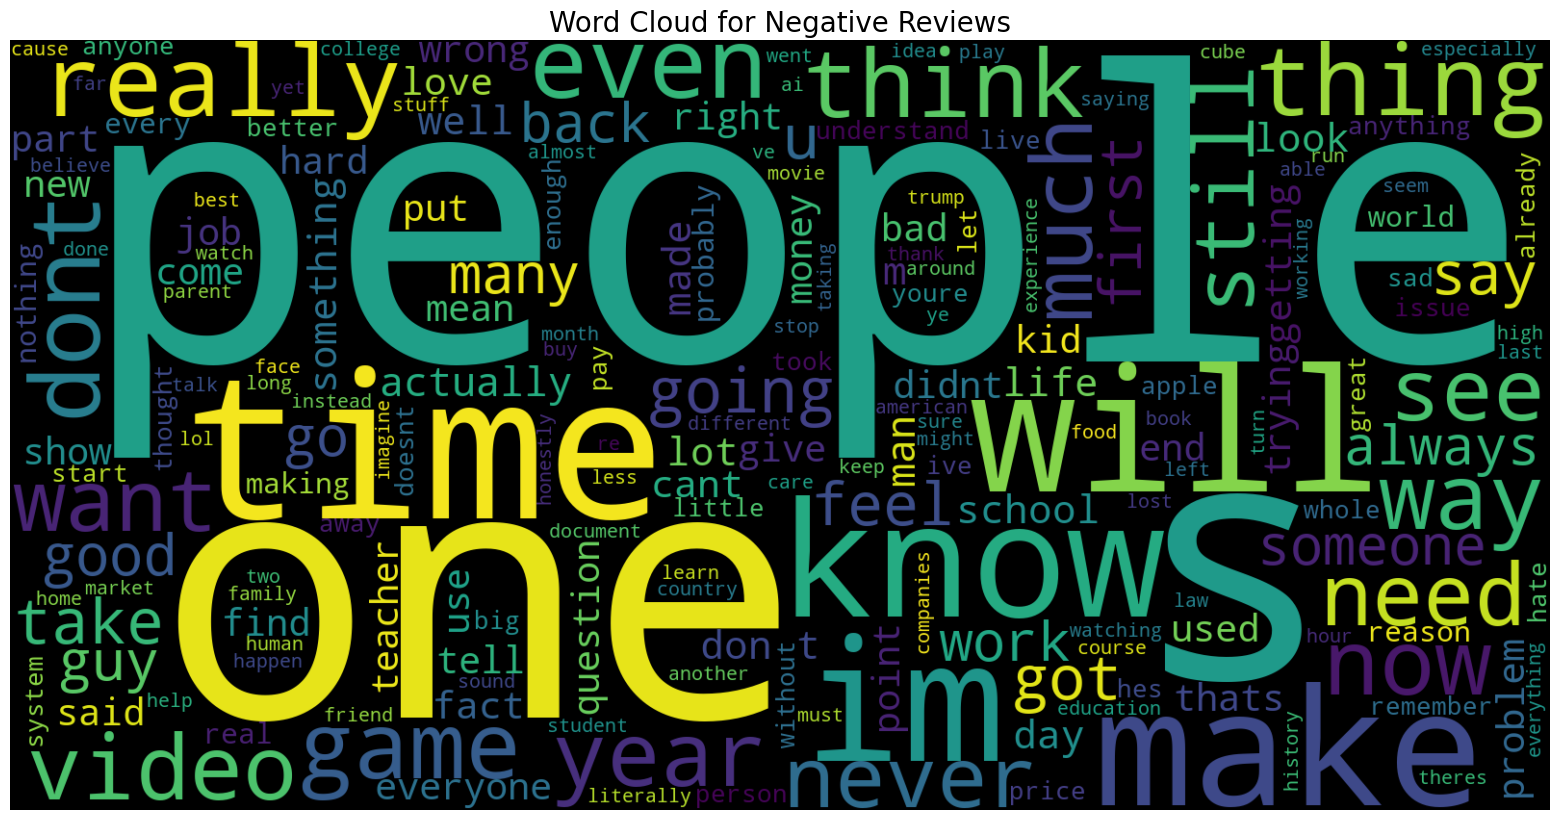

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600, height=800).generate(" ".join(df[df["Sentiment"]=='negative']['Comment']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews", fontsize=20)
plt.show()

<Figure size 2000x2000 with 0 Axes>

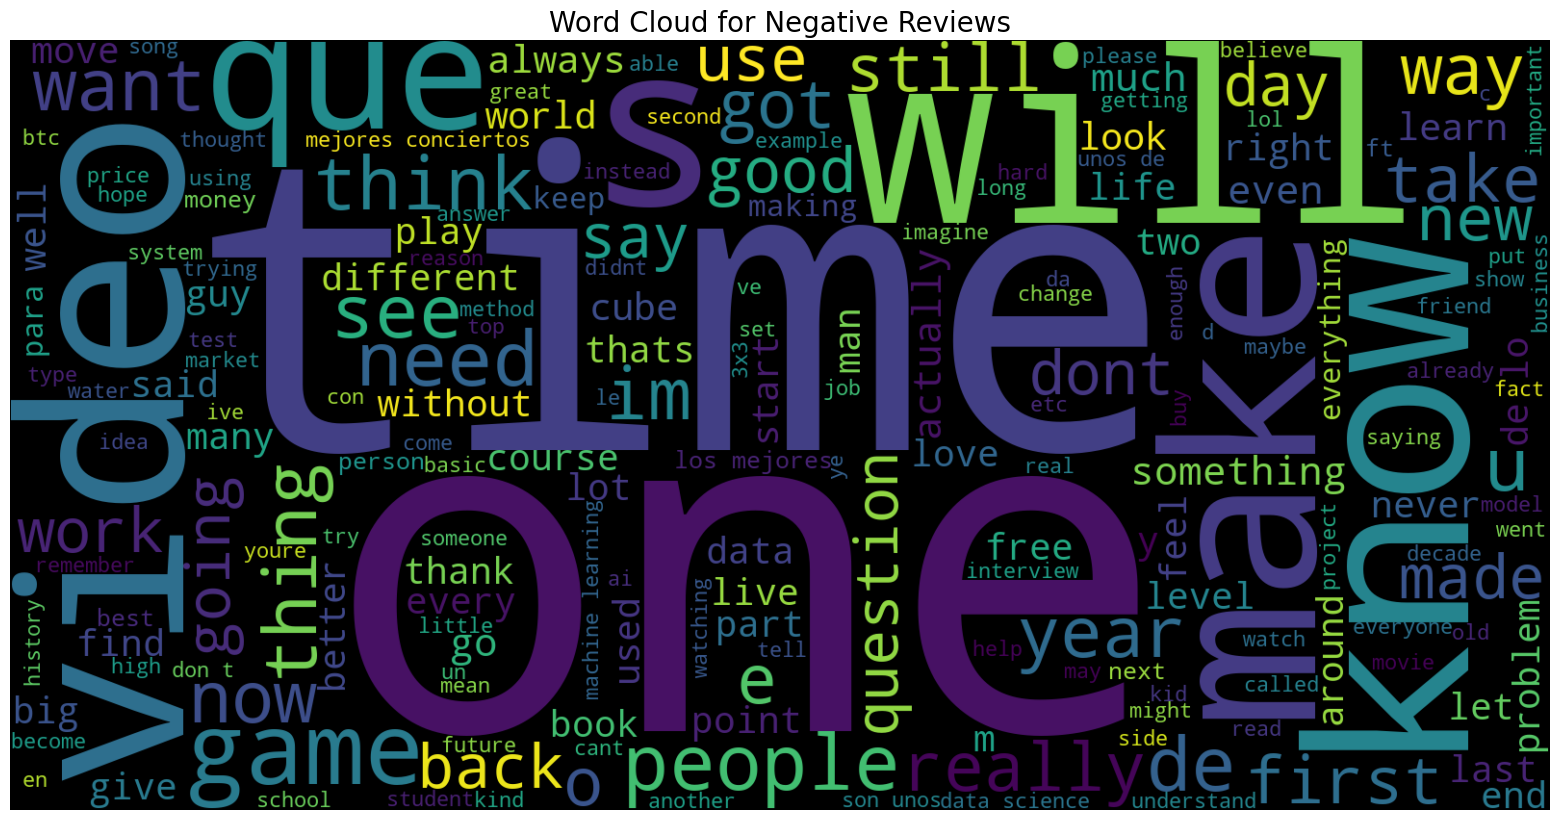

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600, height=800).generate(" ".join(df[df["Sentiment"]=='neutral']['Comment']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews", fontsize=20)
plt.show()

In [80]:
df.to_csv("../data/processed/processed.csv",index=False)

OSError: Cannot save file into a non-existent directory: 'data\processed'